# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [3]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [4]:
# YOUR CODE HERE
# 1)
# Currently, the X array is a one-dimensional array of values.
# In order to add a column, we must first reshape it into a single (70,1):
X = X.reshape(70,1)

# Start by creating an array of one's. In order to concatenate, we must have two
# arrays of the same shape:
shape_X = X.shape
X_one = np.ones(shape=shape_X)

# Finally, concatenate the two arrays:
X = np.concatenate((X_one, X), axis=1)

# 2)
# Print the shape of the array
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:\n', X[0:10,:])

Printing shape of X: (70, 2)
Printing first 10 elements in X:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]


### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [5]:
# YOUR CODE HERE
# Use the train_test_split method to create our splits:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1234)

# Print the results:
print('Printing shape of X_train:', X_train.shape)

print('Printing shape of X_test:', X_test.shape)

print('Printing shape of Y_train:', Y_train.shape)

print('Printing shape of Y_test:', Y_test.shape)

Printing shape of X_train: (56, 2)
Printing shape of X_test: (14, 2)
Printing shape of Y_train: (56,)
Printing shape of Y_test: (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

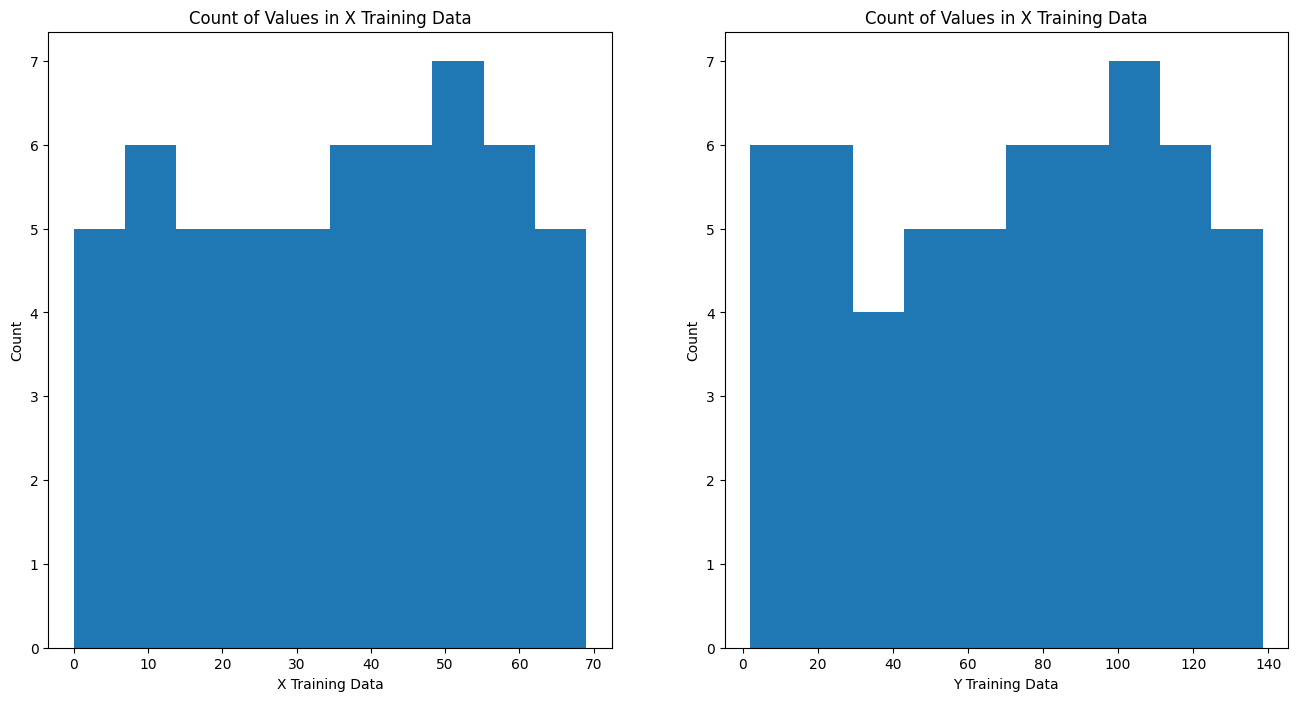

In [6]:
# YOUR CODE HERE
# Create a subplot with 1 row and 2 columns:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Set the positions of the two histograms:
x_train_hist = axes[0]
y_train_hist = axes[1]

# Create the X_train subplot and add labels/title:
x_train_hist.hist(x=X_train[:,1])
x_train_hist.set_xlabel('X Training Data')
x_train_hist.set_ylabel('Count')
x_train_hist.set_title('Count of Values in X Training Data')

# Create the Y_train subplot and add labels/title:
y_train_hist.hist(x=Y_train)
y_train_hist.set_xlabel('Y Training Data')
y_train_hist.set_ylabel('Count')
y_train_hist.set_title('Count of Values in X Training Data');

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [7]:
# YOUR CODE HERE
# Create arrays for the learned parameters in M1 and M2:
M1_w_array = np.array([5, 1])
M2_w_array = np.array([1, 2])

# Use the np.dot() method to predict values in M1_hat_train:
M1_hat_train = np.dot(X_train, M1_w_array)
print('First 10 values of M1_hat_train:', M1_hat_train[:10])
print('Printing shape of M1_hat_train:', M1_hat_train.shape)

# Use the np.dot() method to predict values in M2_hat_train:
M2_hat_train = np.dot(X_train, M2_w_array)
print('First 10 values of M2_hat_train:', M2_hat_train[:10])
print('Printing shape of M2_hat_train:', M2_hat_train.shape)

First 10 values of M1_hat_train: [55. 70. 26. 57. 50. 45. 18. 72. 32. 63.]
Printing shape of M1_hat_train: (56,)
First 10 values of M2_hat_train: [101. 131.  43. 105.  91.  81.  27. 135.  55. 117.]
Printing shape of M2_hat_train: (56,)


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch.

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [8]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape

  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1.
  W = np.ones(n)

  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []

  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W (you did this in exercise 5).
    predictions = np.dot(inputs, W)

    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs

    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.sum(diff**2) / m

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)

    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = np.dot(diff, inputs) / m

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient

  return np.array(weights), np.array(losses)

The Weights after each epoch are:
 [[1.         1.        ]
 [1.00709394 1.33262886]
 [1.01183193 1.55469157]
 [1.01499708 1.7029404 ]
 [1.01711221 1.80191116]]
The Losses after each epoch are:
 [1665.36666086  742.41486626  331.06572624  147.73208293   66.02235863]


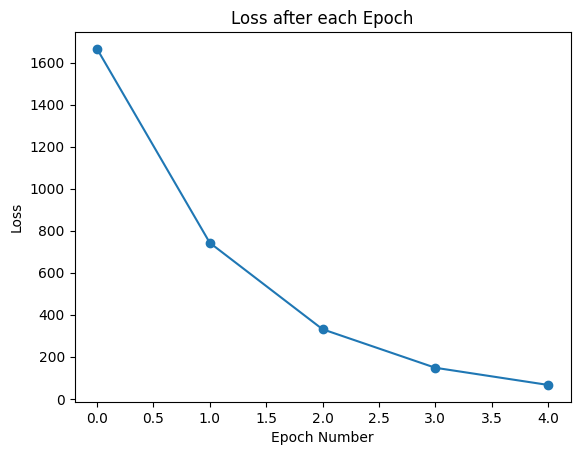

In [9]:
# YOUR CODE HERE
# 2)
# Run this function with our artificial (X_train, Y_train) data.
# Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss
# after each epoch:
gradient_descent_test1 = gradient_descent(
    inputs=X_train, outputs=Y_train, learning_rate=0.0002, num_epochs=5)
print('The Weights after each epoch are:\n', gradient_descent_test1[0])
print('The Losses after each epoch are:\n', gradient_descent_test1[1])

# 3)
# Generate a plot with the loss values on the y-axis and the epoch number on the
# x-axis for visualization. Make sure to include axes name and title.

# Create loss and epoch variables for easier plotting:
losses = gradient_descent_test1[1]
epochs = np.arange(len(losses))

# Create our plot:
plt.plot(epochs, losses, marker = 'o')

# Set labels/title:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Loss after each Epoch')
plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

The Losses after each epoch (a = 0.0002, epochs = 5):
 [1665.36666086  742.41486626  331.06572624  147.73208293   66.02235863]
The Losses after each epoch (a = 0.02, epochs = 5):
 [1.66536666e+03 1.73068342e+06 1.79891175e+09 1.86983017e+12
 1.94354440e+15]
The Losses after each epoch (a = 0.0002, epochs = 10):
 [1.66536666e+03 7.42414866e+02 3.31065726e+02 1.47732083e+02
 6.60223586e+01 2.96052617e+01 1.33745746e+01 6.14074143e+00
 2.91670386e+00 1.47978668e+00]


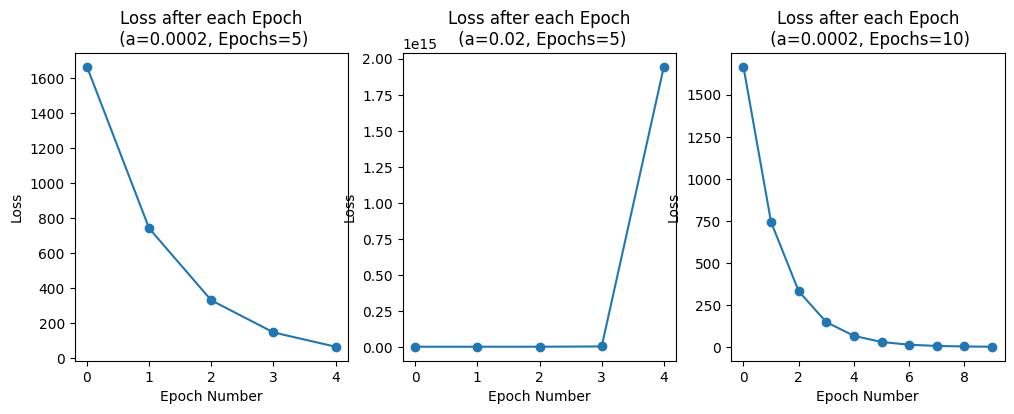

In [10]:
# YOUR CODE HERE
# 1)
# Run the different examples and print the loss after each:

# Learning rate = 0.0002, num_epochs = 5:
gradient_descent_test1 = gradient_descent(
    inputs=X_train, outputs=Y_train, learning_rate=0.0002, num_epochs=5)
print('The Losses after each epoch (a = 0.0002, epochs = 5):\n',
      gradient_descent_test1[1])

# Learning rate = 0.02, num_epochs = 5:
gradient_descent_test2 = gradient_descent(
    inputs=X_train, outputs=Y_train, learning_rate=0.02, num_epochs=5)
print('The Losses after each epoch (a = 0.02, epochs = 5):\n',
      gradient_descent_test2[1])

# Learning rate = 0.0002, num_epochs = 10:
gradient_descent_test3 = gradient_descent(
    inputs=X_train, outputs=Y_train, learning_rate=0.0002, num_epochs=10)
print('The Losses after each epoch (a = 0.0002, epochs = 10):\n',
      gradient_descent_test3[1])

# Plot the results to compare them visually:

# Create variables to store for easier plotting later:
losses1 = gradient_descent_test1[1]
epochs1 = np.arange(len(losses1))

losses2 = gradient_descent_test2[1]
epochs2 = np.arange(len(losses2))

losses3 = gradient_descent_test3[1]
epochs3 = np.arange(len(losses3))

# Create figures for subplots:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

# Set the position of each subplot:
gradient_descent_test1_plot = axes[0]
gradient_descent_test2_plot = axes[1]
gradient_descent_test3_plot = axes[2]

# Plot each:
gradient_descent_test1_plot.plot(epochs1, losses1, marker = 'o')
gradient_descent_test2_plot.plot(epochs2, losses2, marker = 'o')
gradient_descent_test3_plot.plot(epochs3, losses3, marker = 'o')

# Set labels/title for subplot 1:
gradient_descent_test1_plot.set_xlabel('Epoch Number')
gradient_descent_test1_plot.set_ylabel('Loss')
gradient_descent_test1_plot.set_title('Loss after each Epoch\n (a=0.0002, Epochs=5)')

# Set labels/title for subplot 2:
gradient_descent_test2_plot.set_xlabel('Epoch Number')
gradient_descent_test2_plot.set_ylabel('Loss')
gradient_descent_test2_plot.set_title('Loss after each Epoch\n (a=0.02, Epochs=5)')

# Set labels/title for subplot 3:
gradient_descent_test3_plot.set_xlabel('Epoch Number')
gradient_descent_test3_plot.set_ylabel('Loss')
gradient_descent_test3_plot.set_title('Loss after each Epoch\n (a=0.0002, Epochs=10)');

1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;
  - **No, it would not be beneficial to increase the learning rate to 0.02 in our model. As you can see from subplot 2 above, the loss function increases, instead of decreasing. This means that our model has actually diverged away from the true answer, and will not generalize well.**

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.
  - **Yes, increasing the epochs to 10 improves our model by decreasing loss. It appears to approach a minima, as opposed to our original model with 5 epochs.**

### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

In [11]:
# YOUR ANSWER HERE

# We will go with the third model from above (a = 0.0002, Epochs = 10) since it
# produced the lowest loss values.

# For use in the next problem, run the gradient_descent function on these
# chosen parameters:
gradient_descent_test3 = gradient_descent(
    inputs=X_train, outputs=Y_train, learning_rate=0.0002, num_epochs=10)
print('The Weights after each epoch (a = 0.0002, epochs = 10):\n',
      gradient_descent_test3[0])

# To compute M3_hat_train, we must first isolate the weights that gave the best
# results (the last epoch):
M3_w_array = gradient_descent_test3[0][9]
print('The best weights of M3_hat_train are :\n', M3_w_array)

# Compute M3_hat_train using the np.dot() method, similar to above:
M3_hat_train = np.dot(X_train, M3_w_array.T)

# Print the results:
print('The first 10 results of M3_hat_train:\n', M3_hat_train[:10])

The Weights after each epoch (a = 0.0002, epochs = 10):
 [[1.         1.        ]
 [1.00709394 1.33262886]
 [1.01183193 1.55469157]
 [1.01499708 1.7029404 ]
 [1.01711221 1.80191116]
 [1.01852634 1.8679839 ]
 [1.01947249 1.91209397]
 [1.02010622 1.94154177]
 [1.02053137 1.96120106]
 [1.02081727 1.97432553]]
The best weights of M3_hat_train are :
 [1.02081727 1.97432553]
The first 10 results of M3_hat_train:
 [ 99.73709393 129.35197693  42.48165347 103.685745    89.86546627
  79.9938386   26.6870492  133.300628    54.32760667 115.5316982 ]


---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [12]:
# YOUR CODE HERE
# Use the mean_squared_error method from sklearn to compute the MSE of each
# model, using the Y_train dataset as the true values:
M1_mse_train = mean_squared_error(y_true=Y_train, y_pred=M1_hat_train)
M2_mse_train = mean_squared_error(y_true=Y_train, y_pred=M2_hat_train)
M3_mse_train = mean_squared_error(y_true=Y_train, y_pred=M3_hat_train)

# Print the results of each:
print('The MSE of M1_hat_train = ', M1_mse_train)
print('The MSE of M2_hat_train = ', M2_mse_train)
print('The MSE of M3_hat_train = ', M3_mse_train)

The MSE of M1_hat_train =  1397.608983658733
The MSE of M2_hat_train =  0.3280557752885262
The MSE of M3_hat_train =  1.479786682981072


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

In [13]:
# YOUR CODE HERE
# First, compute the values using the test dataset for each model:
M1_hat_test = np.dot(X_test, M1_w_array)
M2_hat_test = np.dot(X_test, M2_w_array)
M3_hat_test = np.dot(X_test, M3_w_array)

# Then, compute MSE for each:
M1_mse_test = mean_squared_error(y_true=Y_test, y_pred=M1_hat_test)
M2_mse_test = mean_squared_error(y_true=Y_test, y_pred=M2_hat_test)
M3_mse_test = mean_squared_error(y_true=Y_test, y_pred=M3_hat_test)

# Print the results:
print('The MSE of M1_hat_train = ', M1_mse_test)
print('The MSE of M2_hat_train = ', M2_mse_test)
print('The MSE of M3_hat_train = ', M3_mse_test)

The MSE of M1_hat_train =  1113.6003911560044
The MSE of M2_hat_train =  0.2908006971666422
The MSE of M3_hat_train =  1.066053488198779


----
#### <span style="color:chocolate">Bonus question</span> (20 points)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

In [14]:
# YOUR ANSWER HERE

In [15]:
# YOUR CODE HERE